# Projet – Détection de Fraude par Carte Bancaire

**Étudiant :** Ben Aymar Youssouf  
**École :** ESIEA – TD38  
**Université partenaire :** UQAC  
**Sujet :** Analyse du dataset de détection de fraudes de cartes bancaires (Credit Card Fraud Detection)

**Source du dataset :** https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## 1. Chargement des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Chargement
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Analyse exploratoire

Shape: (284807, 31)

Distribution des classes:
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


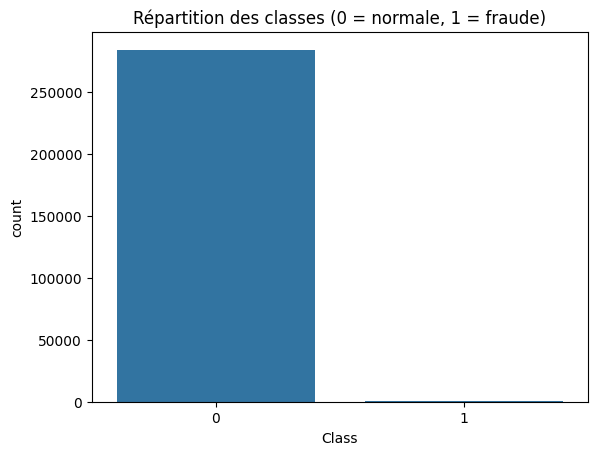

In [2]:
# Taille du dataset
print("Shape:", df.shape)

# Distribution des classes
print("\nDistribution des classes:")
print(df['Class'].value_counts(normalize=True) * 100)

# Graphique de distribution
sns.countplot(data=df, x='Class')
plt.title("Répartition des classes (0 = normale, 1 = fraude)")
plt.show()

## 3. Prétraitement

In [3]:
# Vérification des valeurs manquantes
print(df.isnull().sum().sum())

# Standardisation de Amount et Time
scaler = StandardScaler()
df[['scaled_amount', 'scaled_time']] = scaler.fit_transform(df[['Amount', 'Time']])

# Suppression colonnes originales
df.drop(['Amount', 'Time'], axis=1, inplace=True)

# Définition X et y
X = df.drop('Class', axis=1)
y = df['Class']

0


In [4]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## 4. Modélisation

In [5]:
# Régression logistique
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [6]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

## 5. Évaluation des modèles

In [7]:
def eval_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))

# Logistic Regression
eval_model(y_test, y_pred_lr, "Logistic Regression")

# Random Forest
eval_model(y_test, y_pred_rf, "Random Forest")

--- Logistic Regression ---
[[85280    15]
 [   57    91]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.61      0.72       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

--- Random Forest ---
[[85289     6]
 [   36   112]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.76      0.84       148

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [8]:
# AUC Scores
print("ROC AUC LR:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))
print("ROC AUC RF:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

ROC AUC LR: 0.9559805159517921
ROC AUC RF: 0.9373928005031822


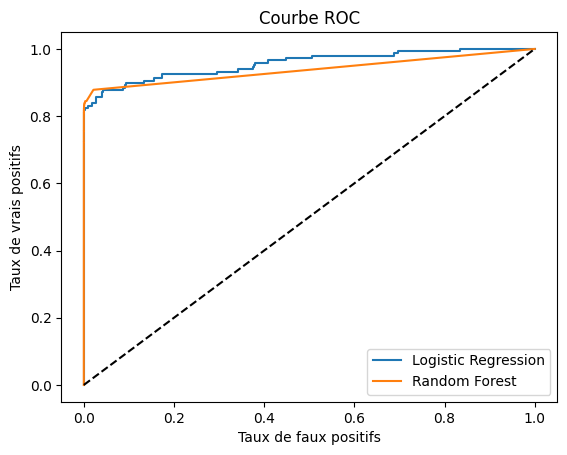

In [9]:
# Courbe ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0,1], [0,1], 'k--')
plt.title("Courbe ROC")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.legend()
plt.show()

## 6. Conclusion

- Le dataset était propre, sans valeurs manquantes.
- Les classes sont déséquilibrées : moins de 0.2% de fraudes.
- La régression logistique est un bon point de départ, mais Random Forest offre de meilleurs résultats.
- L'AUC est une bonne mesure pour comparer les performances.

 Projet finalisé avec succès !